# Indonesian Abusive and Hate Speech Twitter Text Analysis

#### Latar Belakang


Komunikasi merupakan salah satu kebutuhan dasar manusia. Karena manusia merupakan makhluk sosial yang tidak bisa hidup sendiri. Dewasa ini, salah satu komunikasi yang sering digunakan melalui internet atau sosial media.
Sosial media yang digunakan memiliki dampak positif dan dampak negatif. Salah satu dampak negatif adanya kecenderungan seseorang mengomentari media orang lain dengan hate speech, kata abusive, bahasa alay dan masih banyak lagi komentar yang bernilai negatif.   
Berangkat dari fakta diatas , adanya kecenderungan manusia berkomunikasi melalui sosial media dan ditambah dengan berkomentar negatif. Oleh karena itu penelitian ini bertujuan untuk menganalisis kecenderungan kata kasar (Hate Speech), kata abusive, kata yang sering digunakan dalam komentar non-toxic, dan kata yang digunakan dalam komentar toxic.


#### Tujuan Penelitian

1.	Berapa jumlah data (Hate Speech) dan kata abusive dari seluruh tweet yang ada?
2.	Hate speech banyak ditujukan ke siapa? Dan topik apa yang paling sering muncul?
3.	Jelaskan data hasil penelitian dengan menggunalan analisis univariate, analisis bivariate, analisis multivariate?
4.	Berapa banyak kata yang sering digunakan dalam komentar non-toxic dan level tweet toxic/negatif?

In [1]:
# import data yang diperlukan dari beberapa library

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# masukkan data

data = pd.read_csv('/Users/renyoktavianti/miniconda3/envs/DSC-Repository/Challange GOLD/data.csv', encoding='latin-1')

print("Shape: ", data.shape)
data.head(15)

Shape:  (13169, 13)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,0,0,0,0,0,0,0,0,0,0
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,0,0,0,0,0,0,0,0,0,0
8,Nah admin belanja satu lagi port terbaik nak m...,0,0,0,0,0,0,0,0,0,0,0,0
9,USER Enak lg klo smbil ngewe',0,1,0,0,0,0,0,0,0,0,0,0


In [3]:
# info data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [4]:
# cek missing value

data.isna().sum() / len(data)

Tweet            0.0
HS               0.0
Abusive          0.0
HS_Individual    0.0
HS_Group         0.0
HS_Religion      0.0
HS_Race          0.0
HS_Physical      0.0
HS_Gender        0.0
HS_Other         0.0
HS_Weak          0.0
HS_Moderate      0.0
HS_Strong        0.0
dtype: float64

In [5]:
# cek data duplikat

data.duplicated().sum()

125

- Data terdiri dari 13.169 baris dan 13 kolom yang berisi tweet dalam bahasa Indonesia dan klasifikasinya.
- Tidak ada nilai yang hilang dalam data.
- Ada 125 data duplikat dalam data ini. Data duplikat perlu dihapus

In [6]:
# Hapus data yang duplikat

data = data.drop_duplicates()

# cek data

data.duplicated().sum()

0

In [9]:
abusive_dict = pd.read_csv('/Users/renyoktavianti/miniconda3/envs/DSC-Repository/Challange GOLD/abusive.csv')

abusive_dict.head(10)

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing
5,anjir
6,babi
7,bacot
8,bajingan
9,banci


In [10]:
alay_dict = pd.read_csv('/Users/renyoktavianti/miniconda3/envs/DSC-Repository/Challange GOLD/new_kamusalay.csv', encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original', 
                                      1: 'replacement'})
alay_dict

,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
...,...,...
15162,mendikbud,menteri pendidikan dan kebudayaan
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit


In [11]:
id_stopword_dict = pd.read_csv('/Users/renyoktavianti/miniconda3/envs/DSC-Repository/Challange GOLD/stopwordbahasa.csv', header=None)
id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})

In [13]:
id_stopword_dict(10)

,stopword
0,ada
1,adalah
2,adanya
3,adapun
4,agak
...,...
753,wong
754,yaitu
755,yakin
756,yakni


### Cek shape data hatespeech dari data uji

In [14]:
#hatespeech
data.HS.value_counts()

0    7526
1    5518
Name: HS, dtype: int64

In [15]:
print("Toxic shape: ", data[(data['HS'] == 1) | (data['Abusive'] == 1)].shape)
print("Non-toxic shape: ", data[(data['HS'] == 0) & (data['Abusive'] == 0)].shape)

Toxic shape:  (7261, 13)
Non-toxic shape:  (5783, 13)


In [16]:
#Cek data alay
print("Shape: ", alay_dict.shape)
alay_dict.head(15)

Shape:  (15167, 2)


,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
5,aamiin,amin
6,aamiinn,amin
7,aamin,amin
8,aammiin,amin
9,abis,habis


## Preprocess

In [20]:
import re


def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])


def remove_stopword(text):
    text = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text


print("Hapus alphanumeric: ", remove_nonaplhanumeric("Halooo duniaa"))
print("konversi ke lowercase: ", lowercase("rt user halooo, duniaa!"))
print("Hapus karakter yang tidak perlu: ", remove_unnecessary_char("Hehe\n\n RT USER USER apa kabs www.google.com\n  hehe"))
print("Normalisasi kata-kata alay: ", normalize_alay("ahok"))
print("Hapus kata-kata kasar:   ", remove_stopword("kau"))

Hapus alphanumeric:  Halooo duniaa
konversi ke lowercase:  rt user halooo, duniaa!
Hapus karakter yang tidak perlu:  Hehe RT USER USER apa kabs hehe
Normalisasi kata-kata alay:  ahok
Hapus kata-kata kasar:    kau


In [27]:
def preprocess_tweet(text):
    text = lowercase(text) # 1
    text = remove_nonaplhanumeric(text) # 2
    text = remove_unnecessary_char(text) # 2
    text = normalize_alay(text)
    text = remove_stopword(text)
 
    return text

In [28]:
data['Tweet'] = data['Tweet'].apply(preprocess_tweet)

In [30]:
print("Shape: ", data.shape)
data.head(15)

Shape:  (13044, 14)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Type
0,cowok berusaha melacak perhatian gue lantas re...,1,1,1,0,0,0,0,0,1,1,0,0,Hate Speech & Abusive
1,telat tau edan sarap gue bergaul cigax jifla c...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive
2,41 kadang berpikir percaya tuhan jatuh berkali...,0,0,0,0,0,0,0,0,0,0,0,0,None
3,ku tau matamu sipit,0,0,0,0,0,0,0,0,0,0,0,0,None
4,kaum cebong kafir dongoknya dungu haha,1,1,0,1,1,0,0,0,0,0,1,0,Hate Speech & Abusive
5,ya bani taplak kawan kawan xf0 x9f x98 x84 xf0...,1,1,0,1,0,0,0,0,1,0,1,0,Hate Speech & Abusive
6,deklarasi pilihan kepala daerah 2018 aman anti...,0,0,0,0,0,0,0,0,0,0,0,0,None
7,gue selesai re watch aldnoah zero kampret 2 ka...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive
8,admin belanja po terbaik nak makan ais kepal m...,0,0,0,0,0,0,0,0,0,0,0,0,None
9,enak ngewe,0,1,0,0,0,0,0,0,0,0,0,0,Abusive


## 2. Exploratory Data Analysis (EDA)

### 2.1 Tweet yang Mengandung Hate Speech and Abusive Words

In [31]:
# Buat kolom baru untuk tipe tweet

def tweet(x):
    if x['HS'] == 1 and x['Abusive'] == 1:
        return 'Hate Speech & Abusive'
    elif x['HS'] == 1 and x['Abusive'] == 0:
        return 'Hate Speech'
    elif x['HS'] == 0 and x['Abusive'] == 1:
        return 'Abusive'
    else:
        return 'None'

data['Type'] = data.apply(tweet, axis=1)

In [32]:
# Cek kumpulan data

data.head(15)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Type
0,cowok berusaha melacak perhatian gue lantas re...,1,1,1,0,0,0,0,0,1,1,0,0,Hate Speech & Abusive
1,telat tau edan sarap gue bergaul cigax jifla c...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive
2,41 kadang berpikir percaya tuhan jatuh berkali...,0,0,0,0,0,0,0,0,0,0,0,0,None
3,ku tau matamu sipit,0,0,0,0,0,0,0,0,0,0,0,0,None
4,kaum cebong kafir dongoknya dungu haha,1,1,0,1,1,0,0,0,0,0,1,0,Hate Speech & Abusive
5,ya bani taplak kawan kawan xf0 x9f x98 x84 xf0...,1,1,0,1,0,0,0,0,1,0,1,0,Hate Speech & Abusive
6,deklarasi pilihan kepala daerah 2018 aman anti...,0,0,0,0,0,0,0,0,0,0,0,0,None
7,gue selesai re watch aldnoah zero kampret 2 ka...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive
8,admin belanja po terbaik nak makan ais kepal m...,0,0,0,0,0,0,0,0,0,0,0,0,None
9,enak ngewe,0,1,0,0,0,0,0,0,0,0,0,0,Abusive


In [33]:
# Klasifikasi tipe data

data['Type'].value_counts()

None                     5783
Hate Speech & Abusive    3262
Hate Speech              2256
Abusive                  1743
Name: Type, dtype: int64

<Axes: ylabel='Type'>

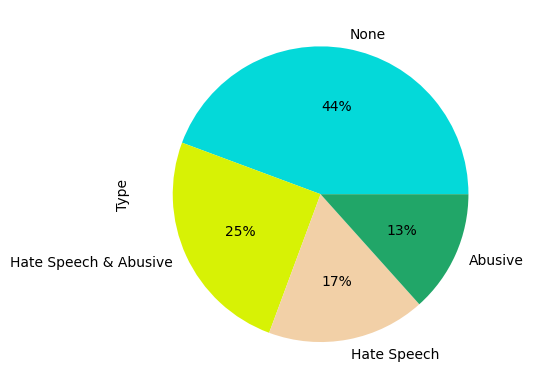

In [34]:
# Visualization

data['Type'].value_counts().plot.pie(autopct='%1.0f%%', colors = ['#04D9D9','#D7F205','#F2D0A7','#21A668'])

Terdapat 56% tweet toxic/negatif dengan komposisi 13% mengandung kata-kata abusive, 17% hate speech, dan 25% mengandung keduanya (hate speech & abusive).

### 2.2 Target Tweet Hate Speech

In [35]:
# Buat kolom baru untuk target tweet toxic/negatif

def target(x):
    if x['HS_Individual'] == 1 and x['HS_Group'] == 1:
        return 'Both'
    elif x['HS_Individual'] == 1 and x['HS_Group'] == 0:
        return 'Individual'
    elif x['HS_Individual'] == 0 and x['HS_Group'] == 1:
        return 'Group'
    else:
        return 'None'

data['Target'] = data.apply(target, axis=1)

In [37]:
# Cek data

data.head(15)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Type,Target
0,cowok berusaha melacak perhatian gue lantas re...,1,1,1,0,0,0,0,0,1,1,0,0,Hate Speech & Abusive,Individual
1,telat tau edan sarap gue bergaul cigax jifla c...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,None
2,41 kadang berpikir percaya tuhan jatuh berkali...,0,0,0,0,0,0,0,0,0,0,0,0,None,None
3,ku tau matamu sipit,0,0,0,0,0,0,0,0,0,0,0,0,None,None
4,kaum cebong kafir dongoknya dungu haha,1,1,0,1,1,0,0,0,0,0,1,0,Hate Speech & Abusive,Group
5,ya bani taplak kawan kawan xf0 x9f x98 x84 xf0...,1,1,0,1,0,0,0,0,1,0,1,0,Hate Speech & Abusive,Group
6,deklarasi pilihan kepala daerah 2018 aman anti...,0,0,0,0,0,0,0,0,0,0,0,0,None,None
7,gue selesai re watch aldnoah zero kampret 2 ka...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,None
8,admin belanja po terbaik nak makan ais kepal m...,0,0,0,0,0,0,0,0,0,0,0,0,None,None
9,enak ngewe,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,None


In [38]:
# klasifikasi target tweet

filter = data['Target'] == 'None'
data[~filter]['Target'].value_counts()

Individual    3540
Group         1978
Name: Target, dtype: int64

<Axes: ylabel='Target'>

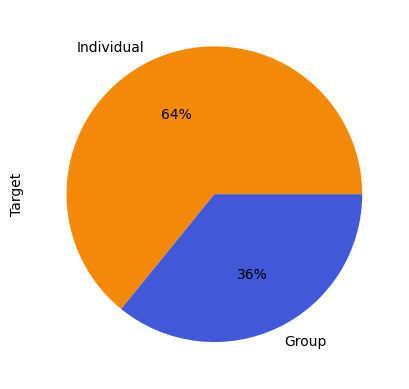

In [39]:
# Visualization

data[~filter]['Target'].value_counts().plot.pie(autopct='%1.0f%%', colors = ['#F28907','#4158D9'])

Sebagian besar tweet dengan hate speech ditujukan kepada individu tertentu dengan rasio 64%.

### 2.3 Topik dan Level Tweet Toxic/Negatif yang Paling Banyak Dibahas di Tweet

In [40]:
# Buat dataframe baru untuk level tweet hate speech
df_level = data[(data['HS_Weak'] == 1) | (data['HS_Moderate']==1) | (data['HS_Strong']==1)].reset_index()

In [41]:
# Buat kolom baru level tweet toxic/negatif

def level(x):
    if x['HS_Weak'] == 1:
        return 'Weak'
    elif x['HS_Moderate'] == 1:
        return 'Moderate'
    elif x['HS_Strong'] == 1:
        return 'Strong'
    else:
        return 'None'
    
df_level['Level'] = df_level.apply(level, axis = 1)

In [42]:
# Pilih kolom berdasarkan level

df_level = pd.DataFrame(df_level, columns=['index', 'Level'])

# Cek dataframe

df_level.head()

,index,Level
0,0,Weak
1,4,Moderate
2,5,Moderate
3,10,Weak
4,11,Weak


In [43]:
# Buat dataframe baru untuk hate speech tweet topics

df_topic = data[data['Target'] != 'None'].reset_index()

In [44]:
# Buat kolom baru untuk negative tweet topics

def HStopic(x):
    if x['HS_Religion'] == 1:
        return 'Religion'
    elif x['HS_Race'] == 1:
        return 'Race'
    elif x['HS_Physical'] == 1:
        return 'Physical'
    elif x['HS_Gender'] == 1:
        return 'Gender' 
    else:
        return 'Other'
    
df_topic['Topic'] = df_topic.apply(HStopic, axis = 1)

In [45]:
# Pilih kolom

df_topic = pd.DataFrame(df_topic, columns=['index', 'Topic'])

# Cek dataframe

df_topic.head()

,index,Topic
0,0,Other
1,4,Religion
2,5,Other
3,10,Other
4,11,Gender


In [46]:
# Gabungkan df_level and df_topic

df = pd.merge(df_topic, df_level, on='index').drop(['index'], axis=1)
df.head()

,Topic,Level
0,Other,Weak
1,Religion,Moderate
2,Other,Moderate
3,Other,Weak
4,Gender,Weak


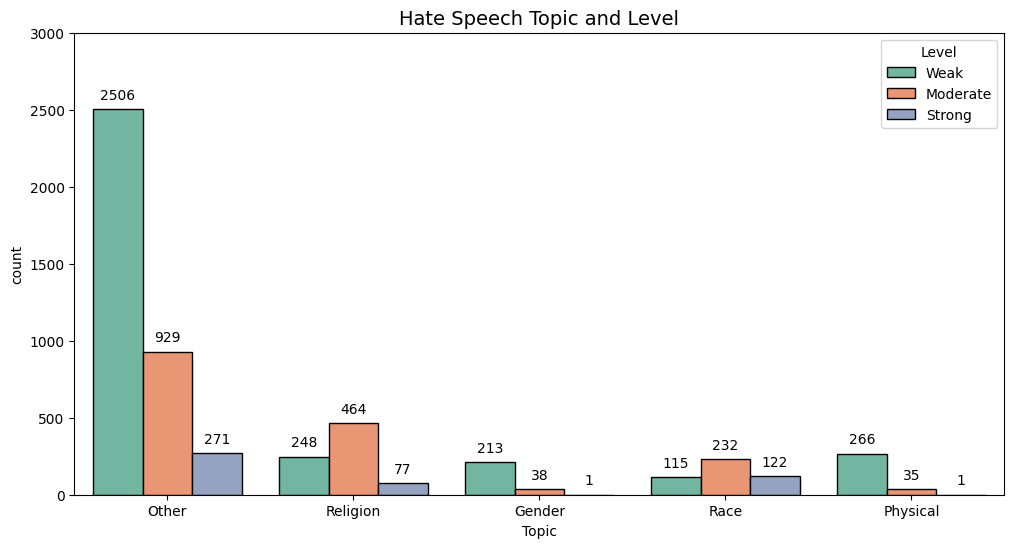

In [47]:
#Visualization

plt.figure(figsize=(12, 6))

plots = sns.countplot(x='Topic',hue='Level',data=df, palette='Set2', edgecolor='black')

for bar in plots.patches: 
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 10),
                   textcoords='offset points')

plt.ylim(0,3000)
plt.title('Hate Speech Topic and Level',fontsize=14)
plt.show()

Topik hate speech yang sering muncul adalah topik umum (Lainnya), diikuti dengan tweet toxic/negatif dengan topik religion. Begitu pula dari level hate speech yang dibahas mayoritas atau kebanyakan yang dibahas topik umum dan diikuti topik religion (Lainnya).

In [50]:
# Tweet HS_Strong dengan contoh HS_Other 

print('Hate Speech Strong dengan Contoh Topik Lainnya: {}'.format(data[(data['HS_Strong'] == 1) & 
                                                                  (data['HS_Other']==1)]['Tweet'][6590]))

Hate Speech Strong dengan Contoh Topik Lainnya: iya negara dipimpin paham mengelola negara lengserkan jokowi


In [48]:
# Tweet HS_Weak dengan contoh HS_Other 

print('Hate Speech Weak dengan Contoh Topik Lainnya: {}'.format(data[(data['HS_Weak'] == 1) & (data['HS_Other']==1)]['Tweet'][0]))

Hate Speech Weak dengan Contoh Topik Lainnya: cowok berusaha melacak perhatian gue lantas remehkan perhatian gue kasih khusus basic cowok bego


In [49]:
# Tweet HS_Moderate dengan contoh HS_Other 

print('Hate Speech Moderate dengan Contoh Topic Lainnya: {}'.format(data[(data['HS_Moderate'] == 1) & 
                                                                    (data['HS_Other']==1)]['Tweet'][35]))

Hate Speech Moderate dengan Contoh Topic Lainnya: pegawai guardian training kayak mentang mentang gue kayak gembel kaos flat shoes be anya dijutekin bangsat malas belinya kabur gue matahari


## 3. Kesimpulan

1. Terdapat 56% tweet toxic/negatif dengan komposisi 13% mengandung kata-kata abusive, 17% hate speech, dan 25% mengandung keduanya (hate speech & abusive).
2. Sebagian besar tweet dengan hate speech ditujukan kepada individu tertentu dengan rasio 64%.
3. Topik hate speech yang sering muncul adalah topik umum (Lainnya), diikuti dengan tweet toxic/negatif dengan topik religion. Begitu pula dari level hate speech yang dibahas mayoritas atau kebanyakan yang dibahas topik umum dan diikuti topik religion (Lainnya).

## Save csv to database

In [62]:
# import 
import pandas as pd
import sqlite3

In [63]:
# buat connection
conn = sqlite3.connect('tweet-cleaning.db')

In [59]:
data.to_csv('preprocessed_indonesian_toxic_tweet.csv', index=False)

In [61]:
#loaded dataset
tweet_cleaning = pd.read_csv('/Users/renyoktavianti/miniconda3/envs/DSC-Repository/Challange GOLD/preprocessed_indonesian_toxic_tweet.csv')
tweet_cleaning.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Type,Target
0,cowok berusaha melacak perhatian gue lantas re...,1,1,1,0,0,0,0,0,1,1,0,0,Hate Speech & Abusive,Individual
1,telat tau edan sarap gue bergaul cigax jifla c...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,None
2,41 kadang berpikir percaya tuhan jatuh berkali...,0,0,0,0,0,0,0,0,0,0,0,0,None,None
3,ku tau matamu sipit,0,0,0,0,0,0,0,0,0,0,0,0,None,None
4,kaum cebong kafir dongoknya dungu haha,1,1,0,1,1,0,0,0,0,0,1,0,Hate Speech & Abusive,Group


In [64]:
# Convert dataframe ke database
tweet_cleaning.to_sql('tweet_cleaning', conn, if_exists='replace',index=False)
tweet_cleaning=pd.DataFrame(tweet_cleaning)
tweet_cleaning

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Type,Target
0,cowok berusaha melacak perhatian gue lantas re...,1,1,1,0,0,0,0,0,1,1,0,0,Hate Speech & Abusive,Individual
1,telat tau edan sarap gue bergaul cigax jifla c...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,None
2,41 kadang berpikir percaya tuhan jatuh berkali...,0,0,0,0,0,0,0,0,0,0,0,0,None,None
3,ku tau matamu sipit,0,0,0,0,0,0,0,0,0,0,0,0,None,None
4,kaum cebong kafir dongoknya dungu haha,1,1,0,1,1,0,0,0,0,0,1,0,Hate Speech & Abusive,Group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13039,berbicara ndasmu congor sekata anjing,1,1,1,0,0,0,1,0,0,1,0,0,Hate Speech & Abusive,Individual
13040,kasur enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,None
13041,hati hati bisu bosan aduh xf0 x9f x98 xaa,0,0,0,0,0,0,0,0,0,0,0,0,None,None
13042,bom real mudah terdeteksi bom terkubur dahsyat...,0,0,0,0,0,0,0,0,0,0,0,0,None,None


In [65]:
conn.commit()
conn.close()

In [72]:
# import 
import pandas as pd
import sqlite3

In [73]:
# buat connection
conn = sqlite3.connect('tweet.db')

In [74]:
# Load abusive data
abusive = pd.read_csv('/Users/renyoktavianti/miniconda3/envs/DSC-Repository/Challange GOLD/abusive.csv')
abusive.head()

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing


In [75]:
# Convert dataframe ke database
abusive.to_sql('abusive', conn, if_exists='replace',index=False)
abusive=pd.DataFrame(abusive)
abusive

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing
...,...
120,rezim
121,sange
122,serbet
123,sipit


In [76]:
# Load kamusalay data
kamusalay = pd.read_csv('new_kamusalay.csv', encoding='latin-1',names=['alay','normal'])
kamusalay.head()

,alay,normal
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [77]:
# Convert dataframe ke database
kamusalay.to_sql('kamusalay', conn, if_exists='replace',index=False)
kamusalay=pd.DataFrame(kamusalay)
kamusalay

,alay,normal
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
...,...,...
15162,mendikbud,menteri pendidikan dan kebudayaan
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit


In [71]:
conn.commit()
conn.close()